In [9]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [10]:
import datetime
import yfinance as yf
import pandas as pd

In [11]:
SP = yf.download(tickers='^GSPC', period = '10y', interval = '1d')['Adj Close']
SP.head()

[*********************100%***********************]  1 of 1 completed


Date
2011-07-25    1337.430054
2011-07-26    1331.939941
2011-07-27    1304.890015
2011-07-28    1300.670044
2011-07-29    1292.280029
Name: Adj Close, dtype: float64

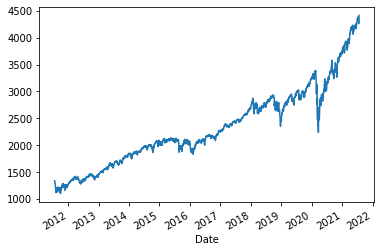

In [12]:
import matplotlib.pyplot as plt
SP.plot()
plt.show()

In [13]:
pip install Prophet

     |████████████████████████████████| 65 kB 554 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.5 MB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6643847 sha256=8431f000a4bfaf555f30b1ebc58bac436ddd82034a307e0a0cfa7c4313cab2ed
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [14]:
from fbprophet import Prophet
import warnings
import datetime as dt
warnings.simplefilter(action='ignore',category=FutureWarning)
SP = yf.download(tickers='^GSPC', period = '20y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [15]:
modelfb = Prophet()
SP = SP.reset_index()
SP[['ds','y']] = SP[['Date','Adj Close']]
modelfb.fit(SP)
future = modelfb.make_future_dataframe(periods=180)


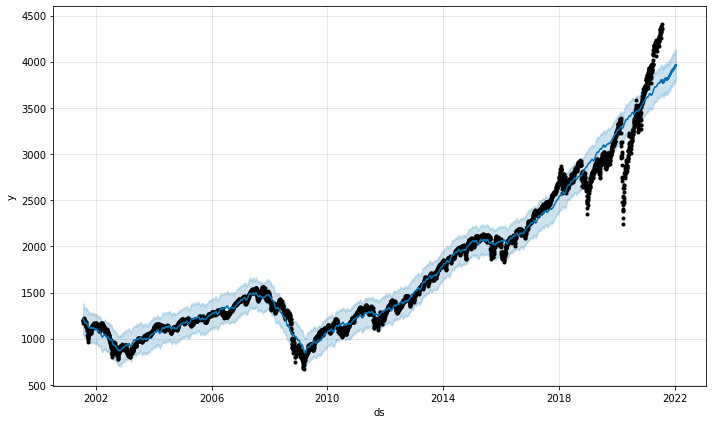

In [16]:
forecast = modelfb.predict(future)
modelfb.plot(forecast)
plt.show()

In [17]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()